<a href="https://colab.research.google.com/github/hoafng2511/fuzy_control/blob/main/MonanVNCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ===============================
# 1. Mount Google Drive
# ===============================
from google.colab import drive
drive.mount('/content/drive')

# ===============================
# 2. Import thư viện
# ===============================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ===============================
# 3. Data generator (ảnh màu)
# ===============================
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    "/content/drive/MyDrive/vnfood_small/validation/",
    target_size=(60, 60),
    batch_size=32,
    class_mode="categorical",
    subset="training",
    color_mode="rgb"
)

val_generator = datagen.flow_from_directory(
    "/content/drive/MyDrive/vnfood_small/validation/",
    target_size=(60, 60),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    color_mode="rgb"
)

print("Class indices:", train_generator.class_indices)

# ===============================
# 4. CNN Model
# ===============================
model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(60, 60, 3)),
    Conv2D(32, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu", padding="same"),
    Conv2D(64, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu", padding="same"),
    Conv2D(128, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# ===============================
# 5. Train
# ===============================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

# ===============================
# 6. Save model
# ===============================
model.save("/content/drive/MyDrive/food_cnn_final.h5")
print("✅ Model CNN đã được lưu xong.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 667 images belonging to 9 classes.
Found 161 images belonging to 9 classes.
Class indices: {'Banh khot': 0, 'Banh mi': 1, 'Banh xeo': 2, 'Bun dau mam tom': 3, 'Bun thit nuong': 4, 'Com tam': 5, 'Hu tieu': 6, 'Nem chua': 7, 'Pho': 8}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,926,953 (7.35 MB)

 Trainable params: 1,926,953 (7.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 160s 8s/step - accuracy: 0.1228 - loss: 2.2088 - val_accuracy: 0.1615 - val_loss: 2.1801
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1454 - loss: 2.1922 - val_accuracy: 0.1615 - val_loss: 2.1783
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.1821 - loss: 2.1790 - val_accuracy: 0.1615 - val_loss: 2.1768
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1543 - loss: 2.1810 - val_accuracy: 0.1615 - val_loss: 2.1742
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1591 - loss: 2.1769 - val_accuracy: 0.1615 - val_loss: 2.1700
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1673 - loss: 2.1739 - val_accuracy: 0.1615 - val_loss: 2.1697
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1357 - loss: 2.1815 - val_accuracy: 0.1615 - val_loss: 2.1686
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.1512 - loss: 2.1719 - val_accuracy: 0.1615 - val_loss

✅ Model CNN đã được lưu xong.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving tải xuống.jpg to tải xuống (1).jpg
👉 File được chọn: tải xuống (1).jpg


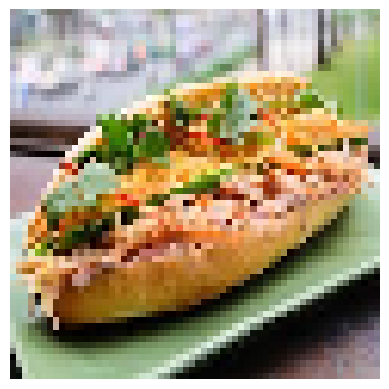

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
🍽️ Dự đoán: Banh mi (15.49%)


In [5]:
# ===============================
# 1. Mount Google Drive
# ===============================
from google.colab import drive
drive.mount('/content/drive')

# ===============================
# 2. Import thư viện
# ===============================
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files  # để upload file

# ===============================
# 3. Load model
# ===============================
model = load_model("/content/drive/MyDrive/food_cnn_final.h5")

# ===============================
# 4. Định nghĩa class
# ===============================
# 2. Mapping class
classes = ["Banh khot", "Banh mi", "Banh xeo",
           "Bun dau mam tom", "Bun thit nuong",
           "Com tam", "Hu tieu", "Nem chua", "Pho"]


# ===============================
# 5. Hàm dự đoán
# ===============================
def predict_image(img_path):
    # Load ảnh
    img = load_img(img_path, target_size=(60, 60))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # Chuẩn hóa
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    pred = model.predict(img_array)
    class_id = np.argmax(pred)
    confidence = np.max(pred) * 100

    print(f"🍽️ Dự đoán: {classes[class_id]} ({confidence:.2f}%)")

# ===============================
# 6. Upload ảnh và test
# ===============================
uploaded = files.upload()
for filename in uploaded.keys():
    print(f"👉 File được chọn: {filename}")
    predict_image(filename)


In [6]:
!pip install streamlit pyngrok tensorflow keras pillow matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.1 MB/s eta 0:00:00


In [7]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image

# ============================
# 1. Load model
# ============================
model = load_model("/content/drive/MyDrive/food_cnn_final.h5")

# ============================
# 2. Danh sách class
# ============================
classes = ["Banh khot", "Banh mi", "Banh xeo",
           "Bun dau mam tom", "Bun thit nuong",
           "Com tam", "Hu tieu", "Nem chua", "Pho"]

# ============================
# 3. Giao diện Streamlit
# ============================
st.title("🍽️ Food Classification App (CNN)")
st.write("Upload ảnh món ăn Việt để dự đoán.")

uploaded_file = st.file_uploader("Chọn ảnh", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Hiển thị ảnh
    image = Image.open(uploaded_file)
    st.image(image, caption="Ảnh đã chọn", use_column_width=True)

    # Chuẩn hóa ảnh
    img = image.resize((60, 60))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    pred = model.predict(img_array)
    class_id = np.argmax(pred)
    confidence = np.max(pred) * 100

    st.success(f"👉 Kết quả: **{classes[class_id]}** ({confidence:.2f}%)")


Writing app.py


In [9]:
!ngrok config add-authtoken 33B1W1I9UORcrdMb1TkB2GNF6HG_6c8J5B44RemHTAi5Y7voj


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [10]:
from pyngrok import ngrok

# Tạo tunnel
public_url = ngrok.connect(8501)
print("App chạy tại:", public_url)

# Chạy app
!streamlit run app.py --server.port 8501 &>/dev/null&


App chạy tại: NgrokTunnel: "https://aeromechanical-subsensuously-marcene.ngrok-free.dev" -> "http://localhost:8501"
